In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

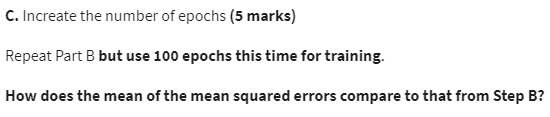

# Prepare data

In [2]:
# Read data
from sklearn.model_selection import train_test_split
data= pd.read_csv('concrete_data.csv')

# Split data
X = data.drop(['Strength'],axis =1)
y = data['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
# Processing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_B = scaler.transform(X_train)
X_test_B = scaler.transform(X_test)

# Build model

In [4]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape=(X.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train & Validate model

In [5]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100

23/23 [==============================] - 1s 11ms/step - loss: 91875.7578 - val_loss: 48401.6250
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 27135.0547 - val_loss: 11534.4512
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 6091.4868 - val_loss: 2605.0762
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 2094.4580 - val_loss: 1567.4406
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 1744.9872 - val_loss: 1477.3584
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 1664.4185 - val_loss: 1413.2949
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 1578.6820 - val_loss: 1349.1984
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 1496.7305 - val_loss: 1283.5970
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 1412.1310 - val_loss: 1219.0416
Epoch 10/100
23/23 [=============================

# Report

In [6]:
# list of mse on test set
mse_history = model.history.history['val_loss']

In [7]:
# Calculate mean and standard deviation
print(f'Mean of MSEs: {np.mean(mse_history)}')
print(f'Standard Deviation of MSEs: {np.std(mse_history)}')

Mean of MSEs: 1065.697265777588
Standard Deviation of MSEs: 4900.115259177075


Both mean and standard deviation increase significantly compare to B